In [108]:
import pickle

In [30]:
!pip install seaborn
!pip install pandas 


In [31]:
import numpy as numpy
import pandas as pd
import cv2
from glob import glob
import seaborn as sns
import matplotlib.pyplot as plt


In [32]:
female_croped_image_path = glob('./croped_data/female/*.jpg')
male_croped_image_path  = glob('./croped_data/male/*.jpg')

In [33]:

#female_croped_image_path 
#male_croped_image_path  


In [34]:
#Create a dataframe with male and female corped image file paths
df_female = pd.DataFrame(female_croped_image_path,columns=['file_path'])
df_female['gender'] = 'female'
df_male = pd.DataFrame(male_croped_image_path,columns=['file_path'])
df_male['gender'] = 'male'

df = pd.concat((df_female,df_male),axis=0)

df.head()
df.tail()

,file_path,gender
2311,./croped_data/male\male994.jpg,male
2312,./croped_data/male\male996.jpg,male
2313,./croped_data/male\male997.jpg,male
2314,./croped_data/male\male998.jpg,male
2315,./croped_data/male\male999.jpg,male


In [35]:
df.shape


(5020, 2)

In [36]:
# Get the size of each image

def get_size(path):
    img = cv2.imread(path)
    return img.shape[0] # Returns the height (number of rows) of the image




In [37]:
df['dimension'] = df['file_path'].apply(get_size)# Stores the size of the image in the data frame as dimension


In [38]:
df.head()

,file_path,gender,dimension
0,./croped_data/female\female0.jpg,female,273
1,./croped_data/female\female1.jpg,female,182
2,./croped_data/female\female100.jpg,female,122
3,./croped_data/female\female1002.jpg,female,122
4,./croped_data/female\female1005.jpg,female,182


### Exploratory data analysis

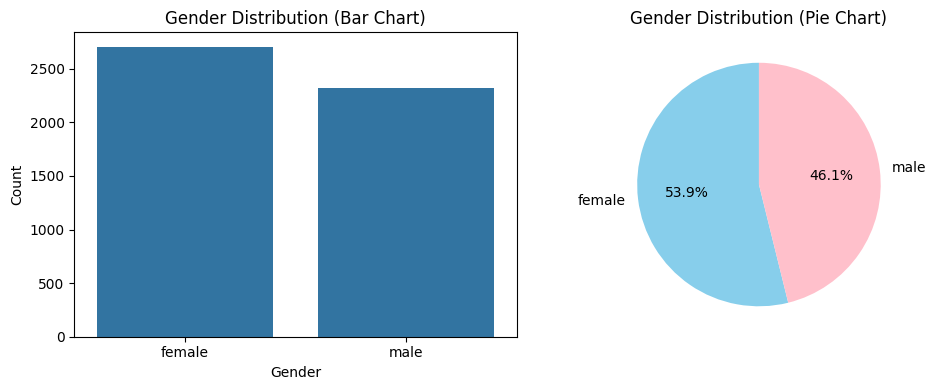

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate value counts
gender_counts = df['gender'].value_counts()

# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Bar chart (subplot 1)
sns.barplot(x=gender_counts.index, y=gender_counts.values, ax=axes[0])
axes[0].set_title("Gender Distribution (Bar Chart)")
axes[0].set_xlabel("Gender")
axes[0].set_ylabel("Count")

# Pie chart (subplot 2)
axes[1].pie(
    gender_counts.values, 
    labels=gender_counts.index, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=['skyblue', 'pink']
)
axes[1].set_title("Gender Distribution (Pie Chart)")

# Adjust layout and display
plt.tight_layout()
plt.show()


<Axes: ylabel='dimension'>

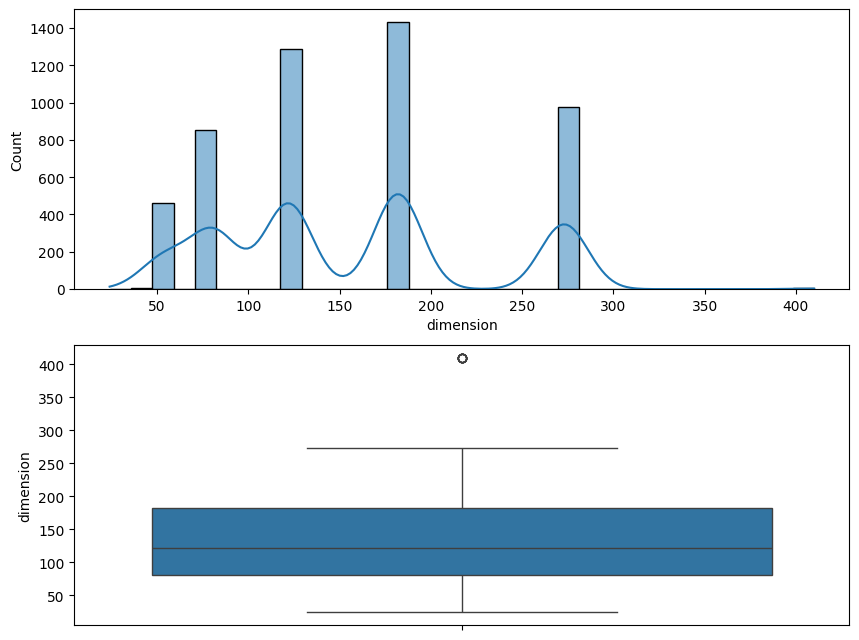

In [40]:
# Let's visualize the distribution of sizes of the images
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
sns.histplot(df['dimension'],kde=True)
plt.subplot(2,1,2)
sns.boxplot(df['dimension'])

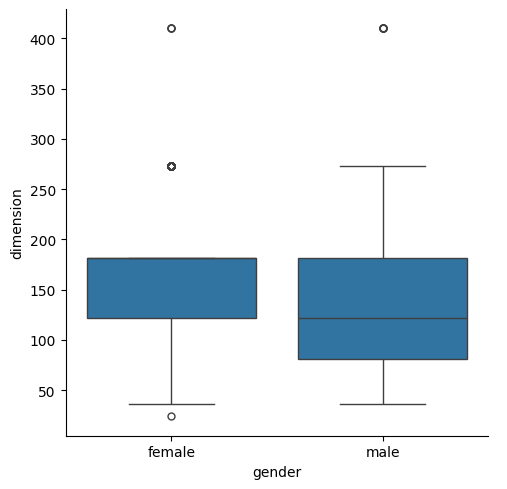

In [41]:
sns.catplot(data=df, x='gender', y='dimension',kind='box')

### Conclusion


1. We have allmost equal distribution of images in terms of gender
2. most of the images are having a diamension more than 60
3. Most of the female images are high diamension compared to male image

**Consider the images with diamension more than 60 less than 60 are outliers**


**Resize all the images into 100 x 100**


In [43]:
# Let's filter the images with diamension >=60
df_filter = df.query('dimension >60')

In [44]:
df_filter.shape

(4553, 3)

In [45]:
df_filter['gender'].value_counts(normalize=True)

gender
female    0.543817
male      0.456183
Name: proportion, dtype: float64

### Stuructre the images to 100 x 100 size

In [92]:
def restructuring_image(path):
    try:
        # Read the image
        img = cv2.imread(path)  # BGR
        if img is None:
            raise FileNotFoundError(f"Image not found or invalid at path: {path}")
        
        # Convert into gray scale image
        gray_scale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
        # Resize into 100 x 100 array
        size = gray_scale.shape[0]
        
        if size >= 100:
            # Use cv2.INTER_AREA to shrink the image
            gray_scale_resize = cv2.resize(gray_scale, (100,100), interpolation=cv2.INTER_AREA)
        else:
            # Use cv2.INTER_CUBIC to enlarge the image
            gray_scale_resize = cv2.resize(gray_scale, (100,100), interpolation=cv2.INTER_CUBIC)
        
        # Flatten the image to 1 x 10000
        flatten_image = gray_scale_resize.flatten()
        return flatten_image

    except:
        
        return None


         


In [93]:
df_filter.loc[:, 'data'] = df_filter['file_path'].apply(restructuring_image)
 # This will convert all images into 100 x 100 size and flatten the image

In [89]:
df_filter.drop(columns=['data'],  inplace=True)


In [94]:
df_filter.head()

,file_path,gender,dimension,data
0,./croped_data/female\female0.jpg,female,273,"[185, 182, 183, 185, 175, 180, 188, 183, 211, ..."
1,./croped_data/female\female1.jpg,female,182,"[33, 24, 31, 29, 28, 30, 29, 33, 35, 32, 47, 8..."
2,./croped_data/female\female100.jpg,female,122,"[50, 49, 35, 34, 42, 40, 36, 40, 68, 60, 46, 4..."
3,./croped_data/female\female1002.jpg,female,122,"[130, 119, 117, 98, 87, 92, 92, 110, 154, 161,..."
4,./croped_data/female\female1005.jpg,female,182,"[234, 234, 233, 229, 231, 204, 126, 106, 81, 5..."


In [95]:
data = df_filter['data'].apply(pd.Series)


In [97]:
data.columns = [f'pixel_{i}' for i in data.columns]

In [98]:
data.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_9990,pixel_9991,pixel_9992,pixel_9993,pixel_9994,pixel_9995,pixel_9996,pixel_9997,pixel_9998,pixel_9999
0,185,182,183,185,175,180,188,183,211,215,...,109,111,115,117,121,116,118,118,117,111
1,33,24,31,29,28,30,29,33,35,32,...,56,47,30,35,23,27,27,36,53,18
2,50,49,35,34,42,40,36,40,68,60,...,208,227,228,235,237,231,222,215,212,210
3,130,119,117,98,87,92,92,110,154,161,...,153,104,62,63,66,80,90,100,107,112
4,234,234,233,229,231,204,126,106,81,56,...,242,242,237,237,239,237,237,240,239,240


### Data Normalization


In [99]:
data = data/255.0

In [101]:
data.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_9990,pixel_9991,pixel_9992,pixel_9993,pixel_9994,pixel_9995,pixel_9996,pixel_9997,pixel_9998,pixel_9999
0,0.725490,0.713725,0.717647,0.725490,0.686275,0.705882,0.737255,0.717647,0.827451,0.843137,...,0.427451,0.435294,0.450980,0.458824,0.474510,0.454902,0.462745,0.462745,0.458824,0.435294
1,0.129412,0.094118,0.121569,0.113725,0.109804,0.117647,0.113725,0.129412,0.137255,0.125490,...,0.219608,0.184314,0.117647,0.137255,0.090196,0.105882,0.105882,0.141176,0.207843,0.070588
2,0.196078,0.192157,0.137255,0.133333,0.164706,0.156863,0.141176,0.156863,0.266667,0.235294,...,0.815686,0.890196,0.894118,0.921569,0.929412,0.905882,0.870588,0.843137,0.831373,0.823529
3,0.509804,0.466667,0.458824,0.384314,0.341176,0.360784,0.360784,0.431373,0.603922,0.631373,...,0.600000,0.407843,0.243137,0.247059,0.258824,0.313725,0.352941,0.392157,0.419608,0.439216
4,0.917647,0.917647,0.913725,0.898039,0.905882,0.800000,0.494118,0.415686,0.317647,0.219608,...,0.949020,0.949020,0.929412,0.929412,0.937255,0.929412,0.929412,0.941176,0.937255,0.941176


In [102]:
data['gender'] = df_filter['gender']

In [103]:
data.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_9991,pixel_9992,pixel_9993,pixel_9994,pixel_9995,pixel_9996,pixel_9997,pixel_9998,pixel_9999,gender
0,0.725490,0.713725,0.717647,0.725490,0.686275,0.705882,0.737255,0.717647,0.827451,0.843137,...,0.435294,0.450980,0.458824,0.474510,0.454902,0.462745,0.462745,0.458824,0.435294,female
1,0.129412,0.094118,0.121569,0.113725,0.109804,0.117647,0.113725,0.129412,0.137255,0.125490,...,0.184314,0.117647,0.137255,0.090196,0.105882,0.105882,0.141176,0.207843,0.070588,female
2,0.196078,0.192157,0.137255,0.133333,0.164706,0.156863,0.141176,0.156863,0.266667,0.235294,...,0.890196,0.894118,0.921569,0.929412,0.905882,0.870588,0.843137,0.831373,0.823529,female
3,0.509804,0.466667,0.458824,0.384314,0.341176,0.360784,0.360784,0.431373,0.603922,0.631373,...,0.407843,0.243137,0.247059,0.258824,0.313725,0.352941,0.392157,0.419608,0.439216,female
4,0.917647,0.917647,0.913725,0.898039,0.905882,0.800000,0.494118,0.415686,0.317647,0.219608,...,0.949020,0.929412,0.929412,0.937255,0.929412,0.929412,0.941176,0.937255,0.941176,female


In [105]:
data.isnull().sum().sum()
# There is no missing value

0

In [110]:
# Save the data for future study as a pickle format
pickle.dump(data,open('./data/data_images_100_100.pickle',mode='wb'))

